# Coolprop test
Saurabh Shirish Prabhu
 
Coolprop python library is widely used for importing fluid properties in python.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

# Define CoolProp-based Cp and density functions for liquid water
def cp_water_func(T_C):
    """
    Returns specific heat of liquid water at atmospheric pressure.
    Input: T_C (float or array) = temperature in °C
    Output: Cp in J/kg·K
    """
    T_K = np.array(T_C) + 273.15  # Convert to Kelvin
    return PropsSI('C', 'T', T_K, 'P', 101325, 'Water')  # 'C' = specific heat

def rho_water_func(T_C):
    """
    Returns density of liquid water at atmospheric pressure.
    Input: T_C (float or array) = temperature in °C
    Output: density in kg/m³
    """
    T_K = np.array(T_C) + 273.15
    return PropsSI('D', 'T', T_K, 'P', 101325, 'Water')  # 'D' = density

# Define a function that generates the table and plots
def generate_water_properties_table_and_plot(T_min, T_max, num_points):
    """
    Generate Cp and Density table for water using CoolProp, and plot them.

    Parameters:
        T_min (float): Minimum temperature in °C
        T_max (float): Maximum temperature in °C
        num_points (int): Number of points between T_min and T_max
    Returns:
        DataFrame with Temperature, Cp, and Density
    """
    # Generate temperature range
    temps_C = np.linspace(T_min, T_max, num_points)
    
    # Calculate properties
    cp_vals = cp_water_func(temps_C)
    rho_vals = rho_water_func(temps_C)

    # Create DataFrame
    water_props_df = pd.DataFrame({
        "Temperature (°C)": temps_C,
        "Specific Heat (J/kg·K)": cp_vals,
        "Density (kg/m³)": rho_vals
    })

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))

    # Specific Heat plot
    ax1.plot(temps_C, cp_vals, color='blue', marker='o')
    ax1.set_xlabel("Temperature (°C)")
    ax1.set_ylabel("Specific Heat (J/kg·K)")
    ax1.set_title("Specific Heat of Water vs Temperature")
    ax1.grid(True)

    # Density plot
    ax2.plot(temps_C, rho_vals, color='green', marker='o')
    ax2.set_xlabel("Temperature (°C)")
    ax2.set_ylabel("Density (kg/m³)")
    ax2.set_title("Density of Water vs Temperature")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return water_props_df

In [5]:
temps_C = np.linspace(0.01, 99, 21)

In [7]:
cp_vals = cp_water_func(temps_C)

In [11]:
rho_vals = rho_water_func(temps_C)

In [13]:
coolprop_df = pd.DataFrame({
    "Temperature (°C)": temps_C,
    "Specific Heat (J/kg·K)": cp_vals,
    "Density (kg/m³)": rho_vals
})

print(coolprop_df)

    Temperature (°C)  Specific Heat (J/kg·K)  Density (kg/m³)
0             0.0100             4219.410230       999.843762
1             4.9595             4205.133961       999.967271
2             9.9090             4195.307007       999.710414
3            14.8585             4188.615274       999.123828
4            19.8080             4184.186084       998.246592
5            24.7575             4181.416130       997.109564
6            29.7070             4179.879042       995.737582
7            34.6565             4179.271666       994.150946
8            39.6060             4179.380172       992.366470
9            44.5555             4180.057002       990.398232
10           49.5050             4181.204286       988.258128
11           54.4545             4182.761439       985.956289
12           59.4040             4184.695687       983.501391
13           64.3535             4186.994782       980.900904
14           69.3030             4189.661399       978.161275
15      

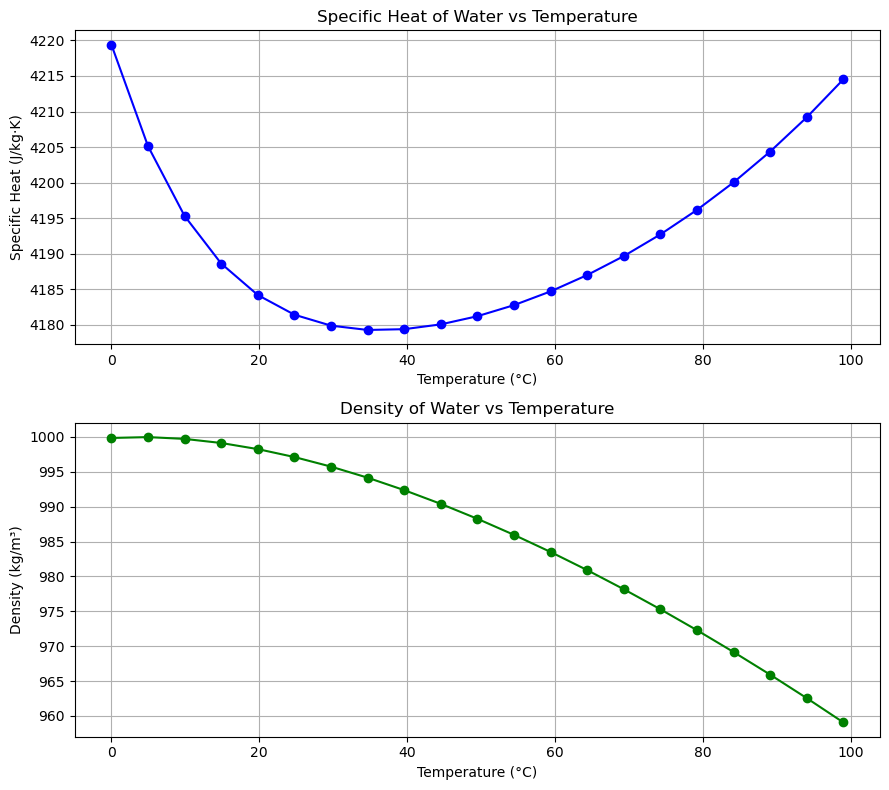

,Temperature (°C),Specific Heat (J/kg·K),Density (kg/m³)
0,0.0100,4219.410230,999.843762
1,4.9595,4205.133961,999.967271
2,9.9090,4195.307007,999.710414
3,14.8585,4188.615274,999.123828
4,19.8080,4184.186084,998.246592
5,24.7575,4181.416130,997.109564
6,29.7070,4179.879042,995.737582
7,34.6565,4179.271666,994.150946
8,39.6060,4179.380172,992.366470
9,44.5555,4180.057002,990.398232


In [15]:
generate_water_properties_table_and_plot(0.01, 99, 21)

## References

    [1]https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html
    [2] http://www.coolprop.org/
    [3] ChatGPT 4o for generating functions 